# 탐색적 데이터 분석

## 탐색적 데이터 분석

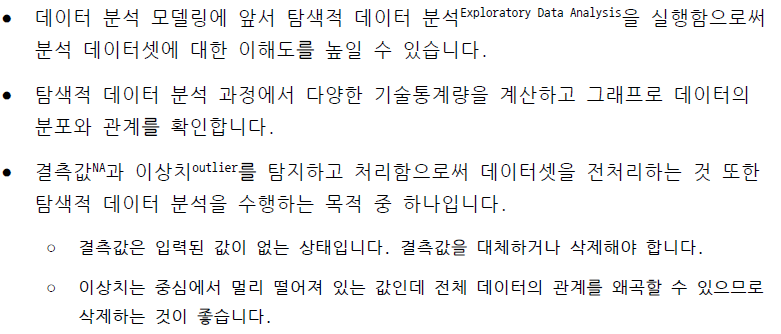

## 실습 데이터셋 소개

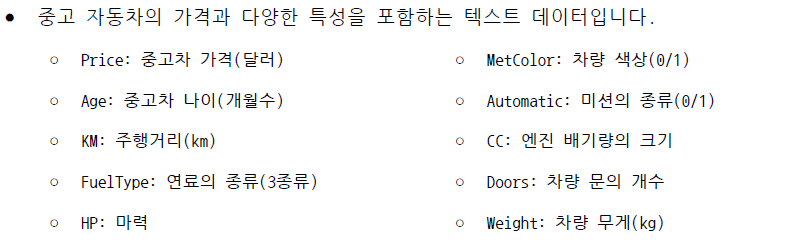

## 관련 라이브러리 호출

### ● 관련 라이브러리를 호출합니다

In [2]:
import os
import joblib
import numpy as np
import pandas as pd

In [5]:
%precision 3
pd.options.display.precision=3

In [47]:
import os #[참고] 라이브러리를 콤마로 나열할 수 있지만 가독성 측면에는 좋지 않습니다.
import joblib
import numpy as np
import pandas as pd

### ● 실수를 출력할 소수점 자리수를 설정합니다

In [6]:
%precision 3 # 실수를 출력할 소수점 자리수를 설정합니다.
pd.options.display.precision=3 # pandas 옵션에서 실수를 출력할 소수점 자리수를 3으로 설정합니다.

ValueError: Precision must be int or format string, not '3 # 실수를 출력할 소수점 자리수를 설정합니다.'

## 작업 경로 확인 및 변경

### ● 현재 작업 경로를 확인합니다

In [10]:
os.getcwd()

'D:\\python\\PythonAdvanced-main\\data'

### ● data 폴더로 작업 경로를 변경합니다

In [11]:
os.chdir(path = '../data')

In [12]:
os.getcwd()

'D:\\python\\PythonAdvanced-main\\data'

### ● 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다

In [13]:
os.listdir()

['.ipynb_checkpoints',
 'ex_1.ipynb',
 'KBO_Hitter_2021.z',
 'Used_Cars_Price.csv',
 'Used_Cars_Price.xlsx',
 'Used_Cars_Price.z',
 'Used_Cars_Price_Prep.z']

## 실습 데이터셋 준비

### ● 인터넷에 공유 중인 텍스트 데이터를 읽고 데이터프레임 df를 생성합니다

In [17]:
df = pd.read_csv(filepath_or_buffer = 'https://bit.ly/Used_Cars_Price')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1275 non-null   int64 
 1   Age        1275 non-null   int64 
 2   KM         1275 non-null   int64 
 3   FuelType   1275 non-null   object
 4   HP         1275 non-null   int64 
 5   MetColor   1275 non-null   int64 
 6   Automatic  1275 non-null   int64 
 7   CC         1275 non-null   int64 
 8   Doors      1275 non-null   int64 
 9   Weight     1275 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 99.7+ KB


In [20]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


### ● df의 정보를 확인합니다

In [25]:
df.info() # 행 개수, 열 개수, 열이름, 자료형, 열별 결측값 아닌 개수 및 자료형을 차례대로 확인합니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1275 non-null   int64 
 1   Age        1275 non-null   int64 
 2   KM         1275 non-null   int64 
 3   FuelType   1275 non-null   object
 4   HP         1275 non-null   int64 
 5   MetColor   1275 non-null   object
 6   Automatic  1275 non-null   object
 7   CC         1275 non-null   int64 
 8   Doors      1275 non-null   int64 
 9   Weight     1275 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 99.7+ KB


### ● df의 처음 5행을 출력합니다

In [24]:
df.head() # [참고] n 매개변수에 전달하는 인수의 기본값은 5입니다.

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


## 실습 데이터셋 전처리

### ● 범주형으로 변환할 열이름으로 리스트를 생성합니다

In [21]:
cols = ['MetColor', 'Automatic']

### ● 지정한 변수를 문자형으로 일괄 변환합니다

In [22]:
df[cols] = df[cols].astype(str)

### ● 열별 자료형을 확인합니다

In [23]:
df.dtypes # MetColor와 Automatic의 자료형이 object로 바뀌었습니다.

Price         int64
Age           int64
KM            int64
FuelType     object
HP            int64
MetColor     object
Automatic    object
CC            int64
Doors         int64
Weight        int64
dtype: object

### ● 실수 및 정수형 변수의 기술통계량을 확인합니다

In [26]:
df.describe() # 실수 및 정수형 변수의 결측값 아닌 개수, 평균, 표준편차, 최솟값, 사분위수 및 최댇값을 확인합니다.
# 여기서 평균이랑 중위수를 봐야함. 이상치가 평균 큰값 쪽에 있음

,Price,Age,KM,HP,CC,Doors,Weight
count,1275.000,1275.000,1275.000,1275.000,1275.000,1275.000,1275.000
mean,9690.233,60.603,73692.409,100.397,1559.513,3.998,1062.692
std,2029.844,13.694,35949.783,13.111,184.690,0.951,39.790
min,4350.000,19.000,1.000,69.000,1300.000,2.000,1000.000
25%,8250.000,51.000,48948.500,86.000,1400.000,3.000,1035.000
50%,9450.000,63.000,67451.000,110.000,1600.000,4.000,1060.000
75%,10950.000,71.500,90325.000,110.000,1600.000,5.000,1075.000
max,15950.000,80.000,243000.000,116.000,2000.000,5.000,1615.000


### ● df를 KM로 오름차순 정렬하고 처음 5행을 출력합니다

In [29]:
df.sort_values(['Age'])

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1273,15950,19,51884,Petrol,97,1,0,1400,3,1100
1274,15950,20,36000,Petrol,110,1,0,1600,5,1075
1269,15750,22,35199,Petrol,97,1,0,1400,3,1100
15,14950,22,30400,Petrol,97,1,0,1400,5,1110
14,14950,22,37400,Petrol,97,1,0,1400,5,1110
...,...,...,...,...,...,...,...,...,...,...
1173,6950,80,62581,Petrol,110,0,0,1600,5,1075
1171,9000,80,63266,Petrol,110,1,0,1600,4,1035
1170,7499,80,63500,Petrol,110,1,0,1600,3,1050
1047,8950,80,86000,Petrol,110,0,0,1600,3,1050


In [33]:
df.sort_values(by = ['KM']).head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
432,11250,47,5309,Petrol,110,1,1,1600,3,1070
18,14900,30,7000,Petrol,97,1,0,1400,5,1100
7,12950,29,9750,Petrol,97,1,0,1400,3,1100
210,13500,43,10000,Petrol,97,1,0,1400,5,1060
9,14950,23,10000,Petrol,97,1,0,1400,3,1100


### ● df에서 KM가 1보다 큰 행을 선택하고 행이름을 초기화합니다

In [44]:
df=df[df['Age'].gt(30)].reset_index(drop=True)
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,12950,32,61000,Diesel,90,0,0,2000,3,1170
1,13250,32,45725,Petrol,110,1,0,1600,5,1075
2,12995,32,29198,Petrol,97,1,0,1400,5,1060
3,6950,43,243000,Diesel,69,0,0,1900,3,1110
4,9500,38,180638,Diesel,90,0,0,2000,4,1160
...,...,...,...,...,...,...,...,...,...,...
1245,8450,80,23000,Petrol,86,0,0,1300,3,1015
1246,7500,69,20544,Petrol,86,1,0,1300,3,1025
1247,10845,72,19000,Petrol,86,0,0,1300,3,1015
1248,8500,71,17016,Petrol,86,0,0,1300,3,1015


In [45]:
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,12950,32,61000,Diesel,90,0,0,2000,3,1170
1,13250,32,45725,Petrol,110,1,0,1600,5,1075
2,12995,32,29198,Petrol,97,1,0,1400,5,1060
3,6950,43,243000,Diesel,69,0,0,1900,3,1110
4,9500,38,180638,Diesel,90,0,0,2000,4,1160
...,...,...,...,...,...,...,...,...,...,...
1245,8450,80,23000,Petrol,86,0,0,1300,3,1015
1246,7500,69,20544,Petrol,86,1,0,1300,3,1025
1247,10845,72,19000,Petrol,86,0,0,1300,3,1015
1248,8500,71,17016,Petrol,86,0,0,1300,3,1015


In [43]:
df = df[df['KM'].gt(1)].reset_index(drop = True) # gt : greater than
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,12950,32,61000,Diesel,90,0,0,2000,3,1170
1,13250,32,45725,Petrol,110,1,0,1600,5,1075
2,12995,32,29198,Petrol,97,1,0,1400,5,1060
3,6950,43,243000,Diesel,69,0,0,1900,3,1110
4,9500,38,180638,Diesel,90,0,0,2000,4,1160
...,...,...,...,...,...,...,...,...,...,...
1245,8450,80,23000,Petrol,86,0,0,1300,3,1015
1246,7500,69,20544,Petrol,86,1,0,1300,3,1025
1247,10845,72,19000,Petrol,86,0,0,1300,3,1015
1248,8500,71,17016,Petrol,86,0,0,1300,3,1015


### ● df의 행 개수를 확인합니다

In [48]:
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,12950,32,61000,Diesel,90,0,0,2000,3,1170
1,13250,32,45725,Petrol,110,1,0,1600,5,1075
2,12995,32,29198,Petrol,97,1,0,1400,5,1060
3,6950,43,243000,Diesel,69,0,0,1900,3,1110
4,9500,38,180638,Diesel,90,0,0,2000,4,1160
...,...,...,...,...,...,...,...,...,...,...
1245,8450,80,23000,Petrol,86,0,0,1300,3,1015
1246,7500,69,20544,Petrol,86,1,0,1300,3,1025
1247,10845,72,19000,Petrol,86,0,0,1300,3,1015
1248,8500,71,17016,Petrol,86,0,0,1300,3,1015


In [50]:
df.shape

(1250, 10)

In [51]:
df.shape[1]

10

In [46]:
df.shape # 행, 열이 다 나옴

(1250, 10)

In [47]:
# df의 행 개수를 확인합니다.
df.shape[0] # 행만 출력

1250

### ● 범주형 변수의 기술통계량을 확인합니다

In [52]:
df.describe(include = object) # 문자형 변수의 결측값 아닌 개수, 중복 제거한 원소 개수, 최빈값 및 최빈값의 빈도수를 확인합니다.

,FuelType,MetColor,Automatic
count,1250,1250,1250
unique,3,2,2
top,Petrol,1,0
freq,1111,827,1181


### ● 범주형 변수의 범주별 빈도수를 출력합니다.

In [54]:
df['MetColor'].value_counts()

1    827
0    423
Name: MetColor, dtype: int64

In [53]:
df['FuelType'].value_counts()#.sort_index() # FuelType의 범주별 빈도수를 출력합니다.

Petrol    1111
Diesel     122
CNG         17
Name: FuelType, dtype: int64

In [57]:
df['MetColor'].value_counts()#.sort_index() # MetColor의 범주별 빈도수를 출력합니다.

1    827
0    423
Name: MetColor, dtype: int64

In [ ]:
df['Automatic'].value_counts()#.sort_index() # Automatic의 범주별 빈도수를 출력합니다.

### ● 범주형 변수의 범주별 상대도수를 출력합니다

In [60]:
df['FuelType'].value_counts(normalize = True)#.sort_index() # FuelType의 범주별 상대도수를 출력합니다.

Petrol    0.889
Diesel    0.098
CNG       0.014
Name: FuelType, dtype: float64

In [63]:
df['MetColor'].value_counts(normalize = True)#.sort_index() # MetColor의 범주별 상대도수를 출력합니다.

1    0.662
0    0.338
Name: MetColor, dtype: float64

In [64]:
df['MetColor'].value_counts(normalize=True)

1    0.662
0    0.338
Name: MetColor, dtype: float64

In [62]:
df['Automatic'].value_counts(normalize = True)#.sort_index() # Automatic의 범주별 상대도수를 출력합니다.

0    0.945
1    0.055
Name: Automatic, dtype: float64

## 시각화 설정: 라이브러리 호출

### ● 관련 라이브러리를 호출합니다

In [72]:
import seaborn as sns # 고급 시각화 함수를 포함하는 라이브러리입니다.
import matplotlib.pyplot as plt # 그래프 크기, 제목, 축이름 등을 지정할 때 사용합니다.
import matplotlib.font_manager as fm # 한글폰트를 지정할 떄 사용합니다

In [67]:
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,12950,32,61000,Diesel,90,0,0,2000,3,1170
1,13250,32,45725,Petrol,110,1,0,1600,5,1075
2,12995,32,29198,Petrol,97,1,0,1400,5,1060
3,6950,43,243000,Diesel,69,0,0,1900,3,1110
4,9500,38,180638,Diesel,90,0,0,2000,4,1160
...,...,...,...,...,...,...,...,...,...,...
1245,8450,80,23000,Petrol,86,0,0,1300,3,1015
1246,7500,69,20544,Petrol,86,1,0,1300,3,1025
1247,10845,72,19000,Petrol,86,0,0,1300,3,1015
1248,8500,71,17016,Petrol,86,0,0,1300,3,1015


### ● 테스트용 그래프를 그립니다

C:\Program Files\python\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
C:\Program Files\python\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Program Files\python\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
C:\Program Files\python\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
C:\Program Files\python\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  func(*args, **kwargs)
C:\Program Files\python\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font

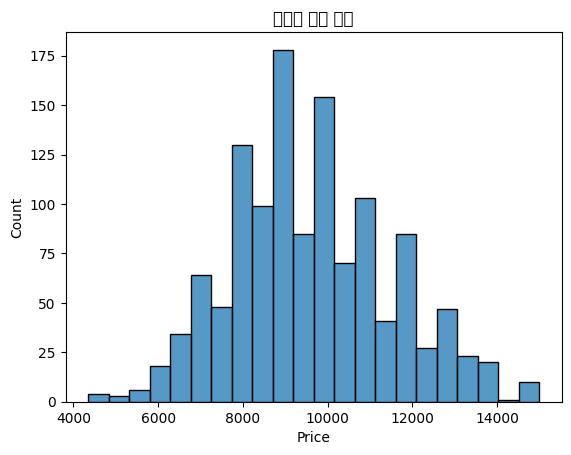

In [69]:
sns.histplot(data = df, x = 'Price')
plt.title(label = '중고차 가격 분포'); #[참고] 시각화 코드 마지막에 추가한 세미콜론(;)은 plt.show() 함수와 같은 기능을 실행합니다.
# 위 코드를 실행하면 한글을 네모로 출력하므로 한글폰트를 설정해야 합니다.
# [참고] 한글폰트 외 그래프 크기 및 해상도 등 다양한 그래픽 파라미터를 설정할 수 있습니다.

In [73]:
from GraphicSetting Import *

SyntaxError: invalid syntax (3691758731.py, line 1)

In [82]:
df['Price'].describe()[['min','max']]

min     4350.0
max    14990.0
Name: Price, dtype: float64

Text(0.5, 1.0, 'Price plot')

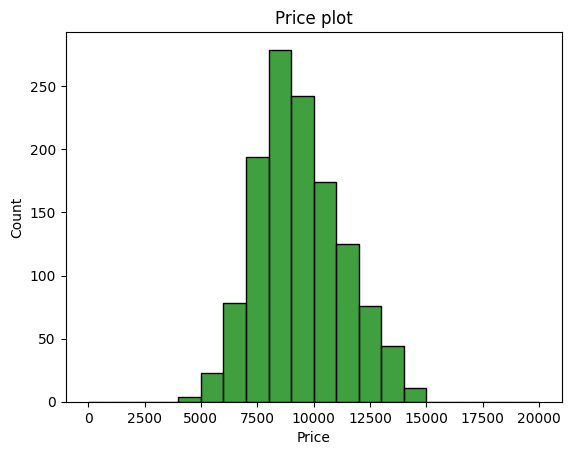

In [86]:
sns.histplot(data=df, x='Price', color='green', binrange=(0,20000), binwidth=1000)
plt.title(label='Price plot')

C:\Program Files\python\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
C:\Program Files\python\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Program Files\python\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
C:\Program Files\python\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
C:\Program Files\python\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  func(*args, **kwargs)
C:\Program Files\python\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font

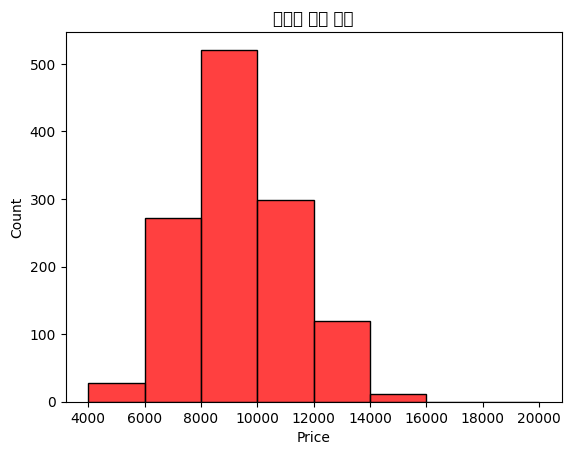

In [81]:
sns.histplot(data=df, x='Price', color='red',
             binrange=(4000,20000), binwidth=2000)
plt.title(label='중고차 가격 분포');

Text(0.5, 1.0, '폰트')

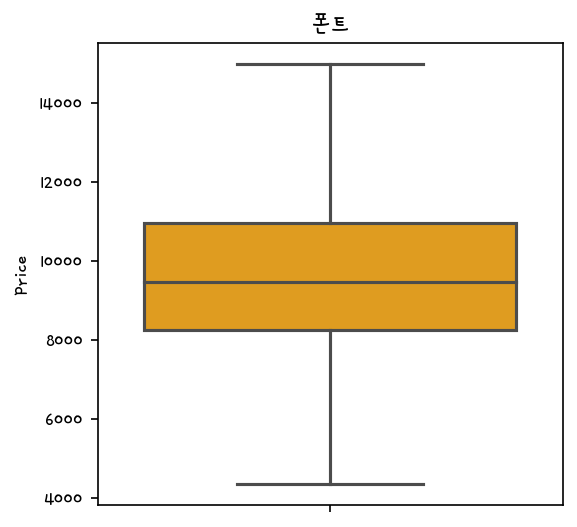

In [101]:
sns.boxplot(data=df, y='Price', color='orange')
plt.title(label='폰트')

In [90]:
df['Price'].describe()

count     1250.000
mean      9601.238
std       1923.109
min       4350.000
25%       8250.000
50%       9450.000
75%      10950.000
max      14990.000
Name: Price, dtype: float64

## 시각화 설정: 한글폰트명 탐색

### ● 현재 사용 중인 컴퓨터에 설치한 전체 폰트 파일명을 리스트로 반환합니다

In [93]:
fontList = fm.findSystemFonts(fontext = 'ttf')
fontList

['C:\\Windows\\Fonts\\TCB_____.TTF',
 'C:\\Windows\\Fonts\\H2MJRE.TTF',
 'C:\\Windows\\Fonts\\JUMJA.TTF',
 'C:\\Windows\\Fonts\\H2GTRE.TTF',
 'C:\\Windows\\Fonts\\GENISO.ttf',
 'C:\\Windows\\Fonts\\CENTAUR.TTF',
 'C:\\Windows\\Fonts\\supef___.ttf',
 'C:\\Windows\\Fonts\\symeteo_.ttf',
 'C:\\Windows\\Fonts\\AcadEref.ttf',
 'C:\\Windows\\Fonts\\MSUIGHUB.TTF',
 'C:\\Windows\\Fonts\\YuGothR.ttc',
 'C:\\Windows\\Fonts\\ERASMD.TTF',
 'C:\\Windows\\Fonts\\framdit.ttf',
 'C:\\Windows\\Fonts\\OCRAEXT.TTF',
 'C:\\Windows\\Fonts\\ITCEDSCR.TTF',
 'C:\\Windows\\Fonts\\PRISTINA.TTF',
 'C:\\Windows\\Fonts\\BOD_I.TTF',
 'C:\\Windows\\Fonts\\cambria.ttc',
 'C:\\Windows\\Fonts\\PERBI___.TTF',
 'C:\\Windows\\Fonts\\H2HDRM.TTF',
 'C:\\Windows\\Fonts\\GILI____.TTF',
 'C:\\Windows\\Fonts\\GLECB.TTF',
 'C:\\Windows\\Fonts\\symath__.ttf',
 'C:\\Windows\\Fonts\\timesbi.ttf',
 'C:\\Windows\\Fonts\\SCHLBKB.TTF',
 'C:\\Windows\\Fonts\\MISTRAL.TTF',
 'C:\\Windows\\Fonts\\monos.ttf',
 'C:\\Windows\\Fonts\\BOD_BLAI.

### ● 리스트에서 특정 문자열(폰트명)을 포함하는 파일명만 선택합니다

In [94]:
fontPath = [font for font in fontList if 'Gamja' in font]
fontPath

['C:\\Users\\byungwoo.lee\\AppData\\Local\\Microsoft\\Windows\\Fonts\\GamjaFlower-Regular.ttf']

### ● 반복문으로 컴퓨터에 설치된 폰트명을 출력합니다

In [95]:
for font in fontPath:
    print(fm.FontProperties(fname = font).get_name())
# 반복문을 실행한 결과에서 마음에 드는 폰트명을 선택하고 plt.rc() 함수에 지정합니다.
# [참고] rc는 runtime configuration를 의미하며, pyplot을 실행하는 환경을 의미합니다.

Gamja Flower


## 시각화 설정: 그래픽 파라미터 설정

### ● 그래프 크기와 해상도를 설정합니다

In [97]:
plt.rc(group = 'figure', figsize = (4, 4), dpi = 150)

### ● 한글폰트와 글자 크기를 설정합니다

In [98]:
plt.rc(group = 'font', family = 'Gamja Flower', size = 10)

### ● 축에 유니코드 마이너스를 출력하지 않도록 설정합니다

In [99]:
plt.rc(group = 'axes', unicode_minus = False) # [참고] 왼쪽 코드를 설정하지 않으면 음수 앞에 ' '를 출력합니다

### ● 범례에 채우기 색과 테두리 색을 추가합니다

In [102]:
plt.rc(group = 'legend', frameon = True, fc = '1', ec = '0')

## [참고] 그래픽 파라미터 설정 관련 모듈 생성

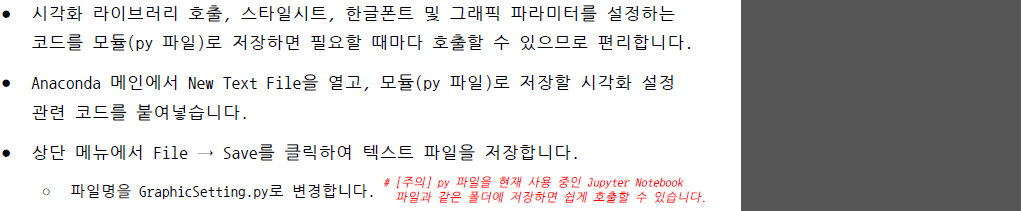

### ● 시각화 설정 모듈을 호출합니다

## [참고] Python 파일 탐색 경로 확인

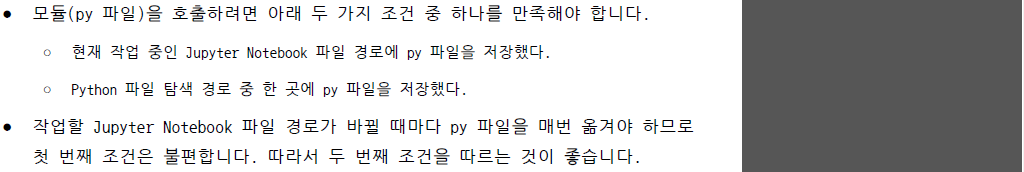

### ● Python 파일 탐색 경로를 확인합니다

In [103]:
import sys # 관련 라이브러리를 호출합니다.

In [104]:
sys.path # Python 파일 탐색 경로를 모두 출력합니다. 많은 경로 중 한 곳(마지막 경로 추천)에 py 파일을 저장하면 해당 모듈을 -
# 항상 호출할 수 있습니다

['D:\\python\\PythonAdvanced-main\\code',
 'C:\\Program Files\\python\\python310.zip',
 'C:\\Program Files\\python\\DLLs',
 'C:\\Program Files\\python\\lib',
 'C:\\Program Files\\python',
 '',
 'C:\\Program Files\\python\\lib\\site-packages',
 'C:\\Program Files\\python\\lib\\site-packages\\win32',
 'C:\\Program Files\\python\\lib\\site-packages\\win32\\lib',
 'C:\\Program Files\\python\\lib\\site-packages\\Pythonwin']

## [참고] 시각화 함수 모듈 제공

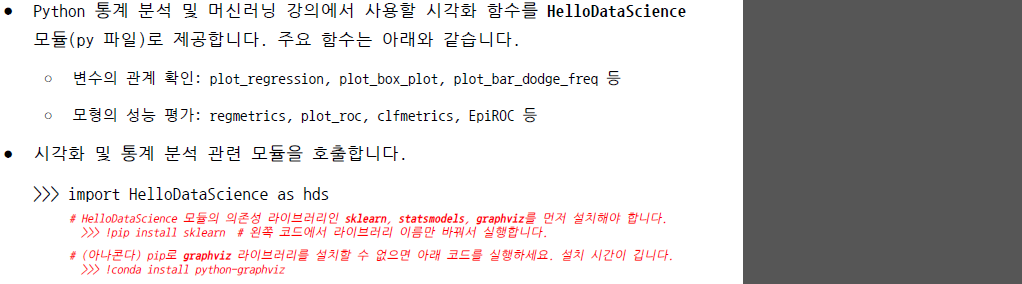

In [110]:
import HelloDataScience as hds

## 목표변수 분포 확인

### ● 목표번수의 최솟값과 최댓값을 확인합니다

In [108]:
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,12950,32,61000,Diesel,90,0,0,2000,3,1170
1,13250,32,45725,Petrol,110,1,0,1600,5,1075
2,12995,32,29198,Petrol,97,1,0,1400,5,1060
3,6950,43,243000,Diesel,69,0,0,1900,3,1110
4,9500,38,180638,Diesel,90,0,0,2000,4,1160
...,...,...,...,...,...,...,...,...,...,...
1245,8450,80,23000,Petrol,86,0,0,1300,3,1015
1246,7500,69,20544,Petrol,86,1,0,1300,3,1025
1247,10845,72,19000,Petrol,86,0,0,1300,3,1015
1248,8500,71,17016,Petrol,86,0,0,1300,3,1015


In [105]:
df['Price'].describe()[['min', 'max']]

min     4350.0
max    14990.0
Name: Price, dtype: float64

### ● 히스토그램을 그립니다

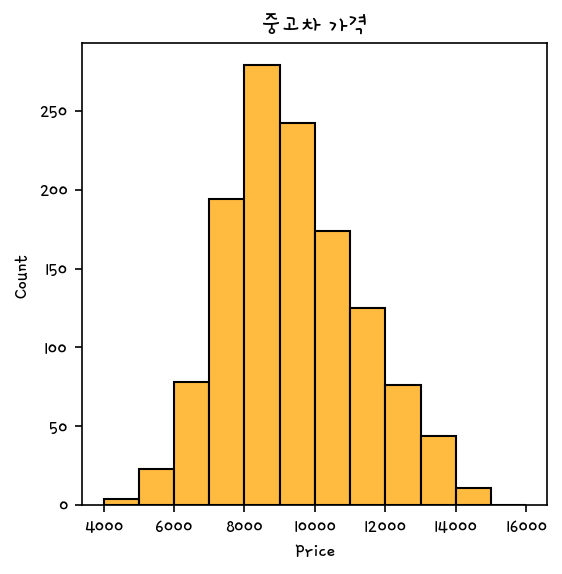

In [106]:
sns.histplot(data = df, x = 'Price', binwidth = 1000, 
             binrange = (4000, 16000), color = 'orange')
plt.title(label = '중고차 가격');

### ● 상자 수염 그림을 그립니다

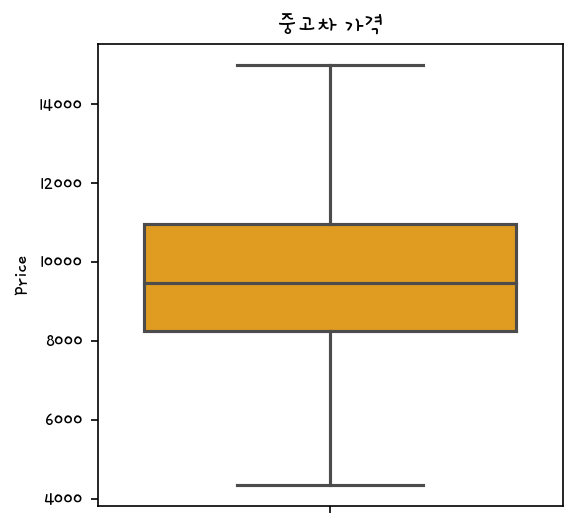

In [109]:
sns.boxplot(data = df, y = 'Price', color = 'orange')
plt.title(label = '중고차 가격');

## 연속형 입력변수와 관계 파악 : Age

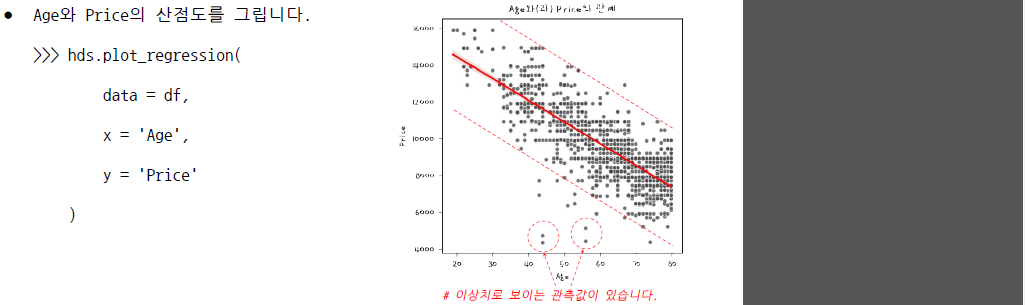

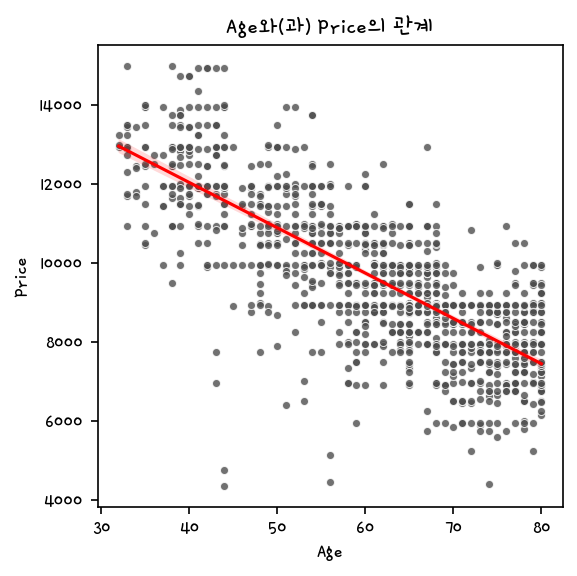

In [111]:
hds.plot_regression(data=df, x='Age', y='Price')

## 연속형 입력변수와 관계 파악 : KM

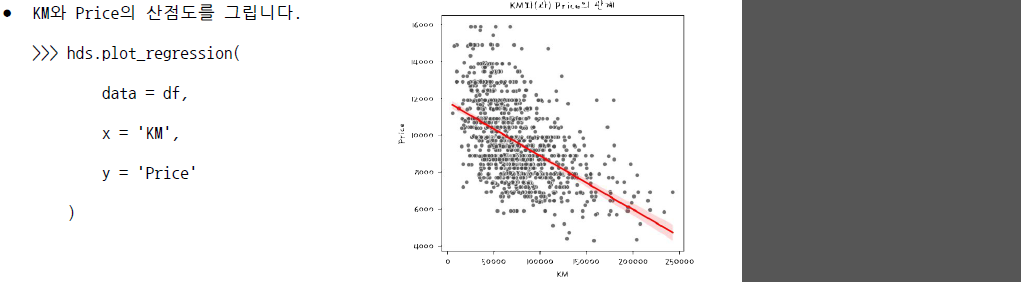

## 연속형 입력변수와 관계 파악 : HP

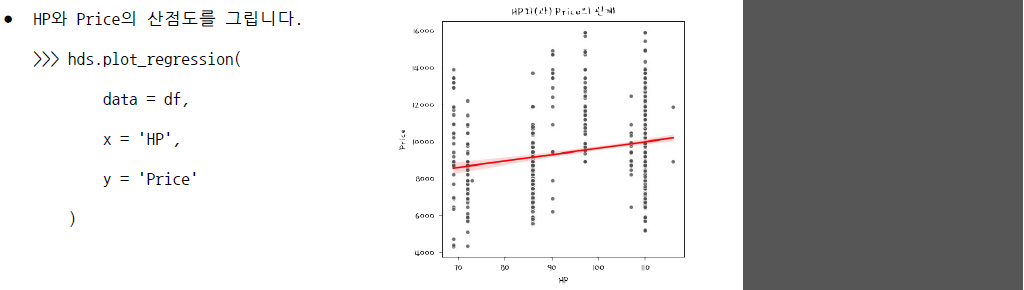

## 연속형 입력변수와 관계 파악 : CC

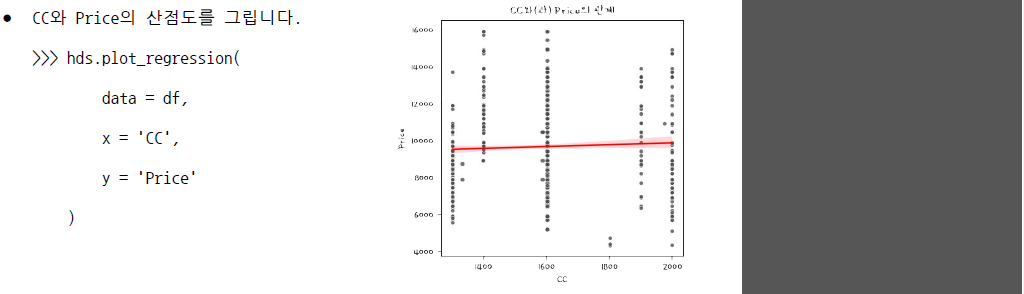

## 연속형 입력변수와 관계 파악 : Doors

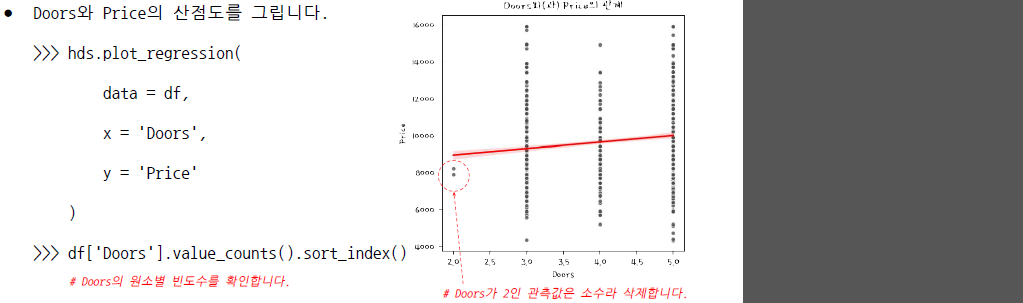

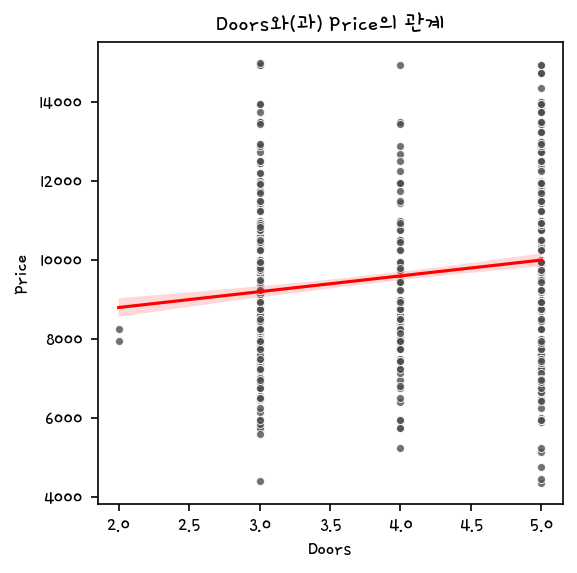

In [112]:
hds.plot_regression(data=df, x='Doors', y='Price')

## 연속형 입력변수와 관계 파악 : Weight

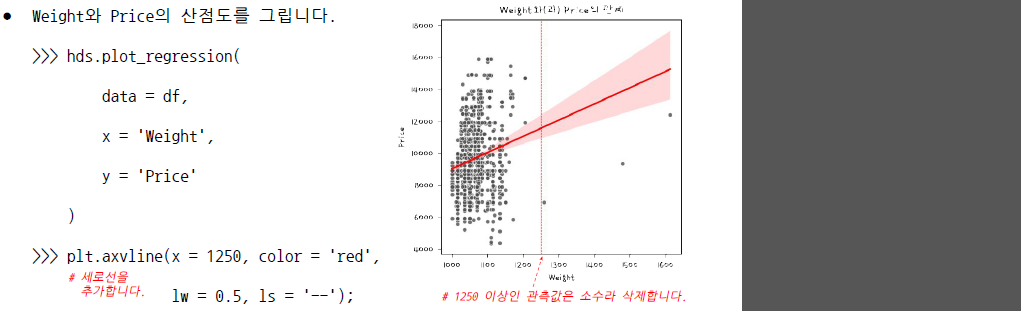

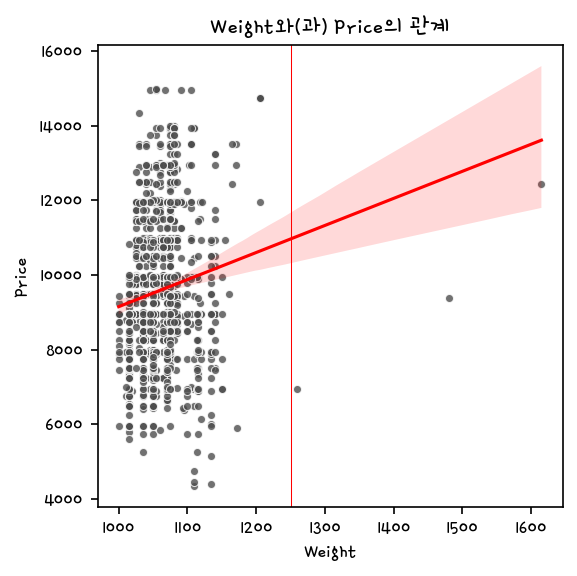

In [118]:
hds.plot_regression(data=df, x='Weight', y='Price')
plt.axvline(x=1250, color='red', lw=0.5, ls='-')

## 범주형 입력변수와 관계 파악 : FuelType

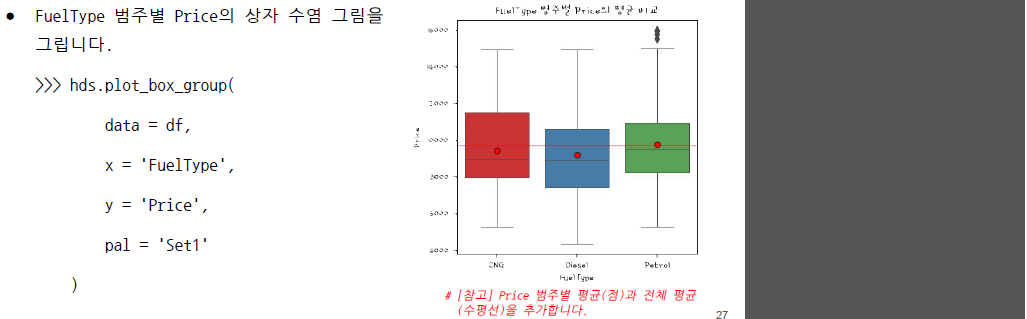

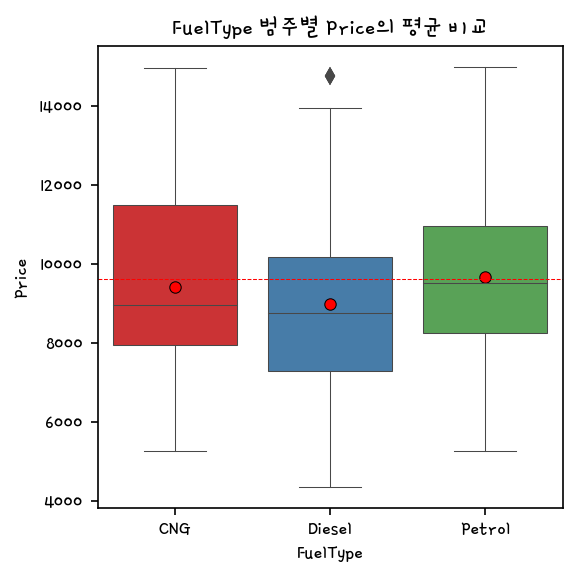

In [119]:
hds.plot_box_group(data=df, x='FuelType', y='Price', pal='Set1')

## 범주형 입력변수와 관계 파악 : MetColor

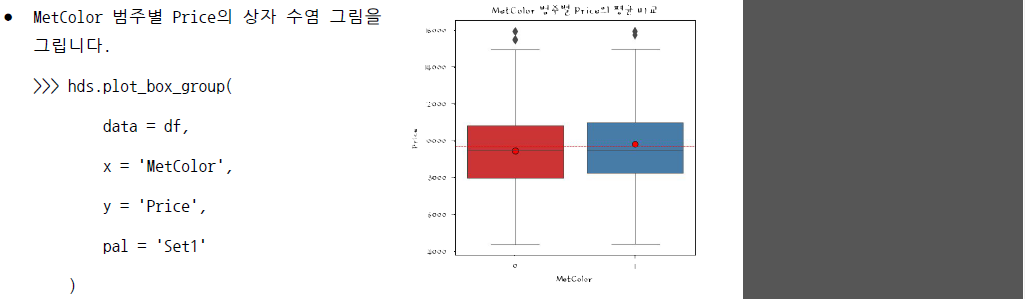

## 범주형 입력변수와 관계 파악 : Automatic

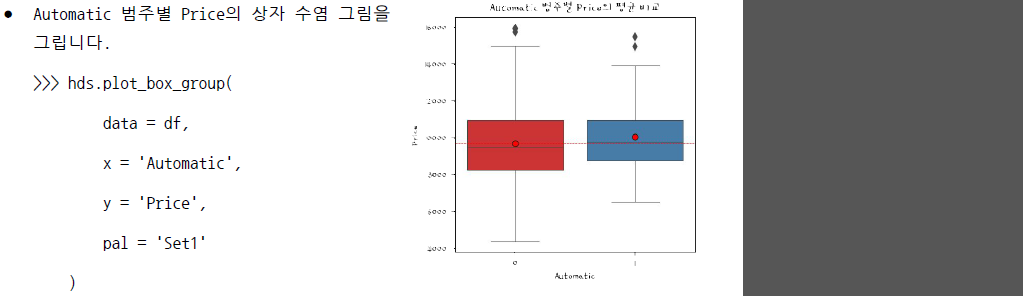

## 불필요한 행 삭제

### ● 시각화 결과 불필요하다고 판단하는 일부 행을 삭제합니다

In [ ]:
df=df[df['Doors'].ne(2) & df[]]

In [121]:
df = df[df['Doors'].ne(2) & df['Weight'].le(1250)] # ne:not equal 
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,12950,32,61000,Diesel,90,0,0,2000,3,1170
1,13250,32,45725,Petrol,110,1,0,1600,5,1075
2,12995,32,29198,Petrol,97,1,0,1400,5,1060
3,6950,43,243000,Diesel,69,0,0,1900,3,1110
4,9500,38,180638,Diesel,90,0,0,2000,4,1160
...,...,...,...,...,...,...,...,...,...,...
1245,8450,80,23000,Petrol,86,0,0,1300,3,1015
1246,7500,69,20544,Petrol,86,1,0,1300,3,1025
1247,10845,72,19000,Petrol,86,0,0,1300,3,1015
1248,8500,71,17016,Petrol,86,0,0,1300,3,1015


### ● df의 행이름을 초기화합니다

In [122]:
df = df.reset_index(drop = True)

### ● df의 행 개수를 확인합니다

In [123]:
df.shape[0]

1245

### ● 열별 기술통계량을 확인합니다

In [124]:
df.describe()

,Price,Age,KM,HP,CC,Doors,Weight
count,1245.000,1245.000,1245.000,1245.000,1245.000,1245.000,1245.000
mean,9603.660,61.256,74387.675,100.525,1558.457,4.009,1060.524
std,1922.846,12.921,35784.493,13.160,182.180,0.948,33.017
min,4350.000,32.000,5309.000,69.000,1300.000,3.000,1000.000
25%,8250.000,52.000,49580.000,86.000,1400.000,3.000,1035.000
50%,9450.000,63.000,68238.000,110.000,1600.000,4.000,1060.000
75%,10950.000,72.000,91246.000,110.000,1600.000,5.000,1075.000
max,14990.000,80.000,243000.000,116.000,2000.000,5.000,1205.000


## 외부 파일로 저장

### ● df를 xlsx 파일로 저장합니다

In [ ]:
df.to_excel('Used_Cars_Price.xlsx', index = None)
# excel은 속도가 느리다(치명적인 단점) 

### ● df를 csv 파일로 저장합니다

In [ ]:
df.to_csv('Used_Cars_Price.csv', index = None)

### ● df를 z 파일로 저장합니다

In [ ]:
joblib.dump()

In [125]:
joblib.dump(value = df, filename = 'Used_Cars_Price.z')

['Used_Cars_Price.z']

In [126]:
os.listdir()

['.ipynb_checkpoints',
 'ex_1.ipynb',
 'KBO_Hitter_2021.z',
 'Used_Cars_Price.csv',
 'Used_Cars_Price.xlsx',
 'Used_Cars_Price.z',
 'Used_Cars_Price_Prep.z']

## End of Document